In [3]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import shuffle
from sklearn.cluster import SpectralClustering
from matplotlib.pyplot import imshow
from skimage.io import imread
import numpy as np
import pylab as plt
%matplotlib inline

In [2]:
digits = load_digits()
digits.data, digits.images, digits.target = shuffle(digits.data, digits.images, digits.target)

In [3]:
mi_k_means = list()
rs_k_means = list()
for n_init in range(1,100,1):
    kmeans = KMeans(init='k-means++', n_clusters=10, n_init=n_init)
    pred = kmeans.fit_predict(digits.data)
    mi_k_means.append(adjusted_mutual_info_score(digits.target, pred))
    rs_k_means.append(adjusted_rand_score(digits.target, pred))

In [4]:
mi_rand = list()
rs_rand = list()
for n_init in range(1,100,1):
    kmeans = KMeans(init='random', n_clusters=10, n_init=n_init)
    pred = kmeans.fit_predict(digits.data)
    mi_rand.append(adjusted_mutual_info_score(digits.target, pred))
    rs_rand.append(adjusted_rand_score(digits.target, pred))

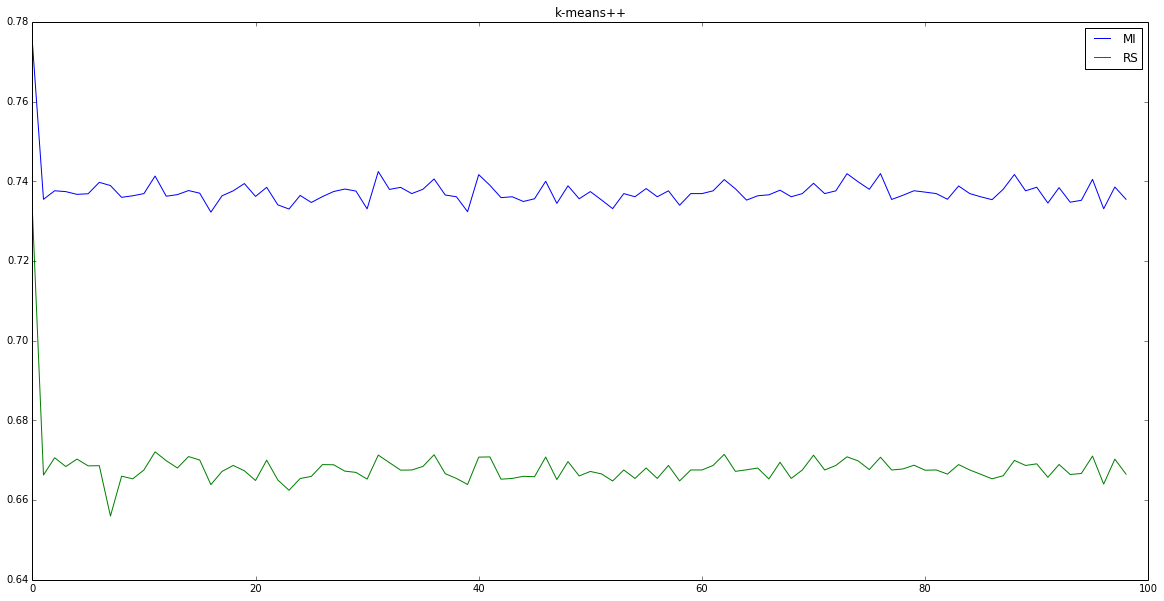

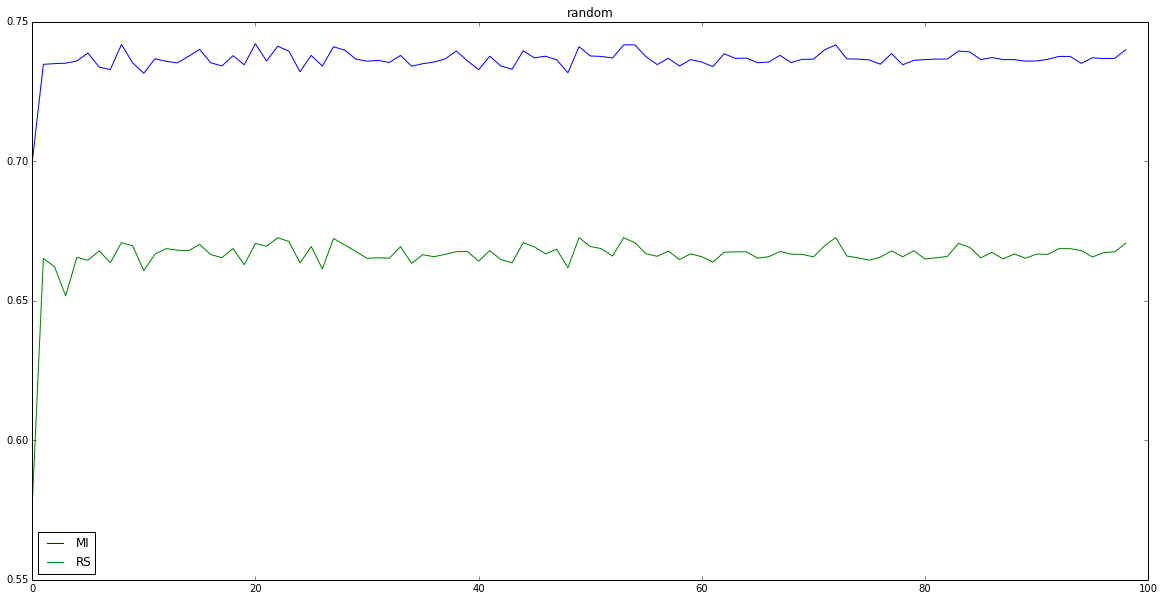

In [5]:
l = plt.figure(figsize=(20, 10))
plt.plot(mi_k_means, label = 'MI')
plt.plot(rs_k_means, label = 'RS')
plt.title("k-means++")
plt.legend(loc='best')
plt.show()
l = plt.figure(figsize=(20, 10))
plt.plot(mi_rand, label = 'MI')
plt.plot(rs_rand,label = 'RS')
plt.title("random")
plt.legend(loc='best')
plt.show()

It is obvious from graphs, that Adjusted Mutual Information and Adjusted Rand Index are correlated.

[2 6 9 ..., 3 4 6]
[1 5 2 ..., 7 6 5]


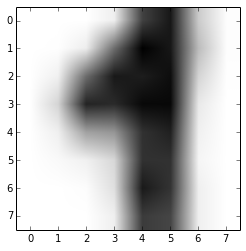

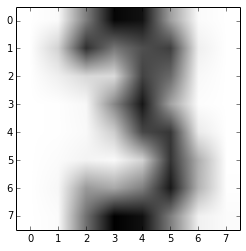

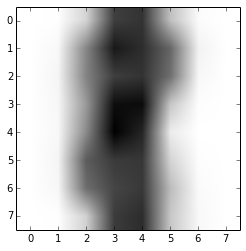

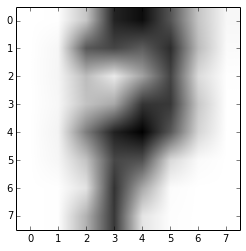

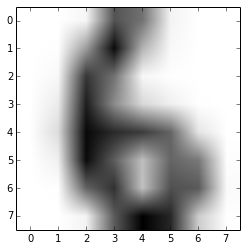

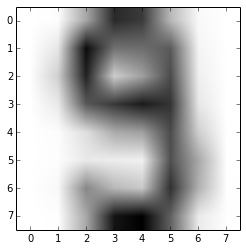

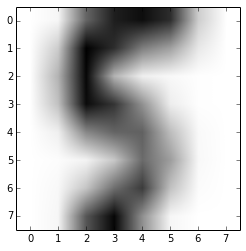

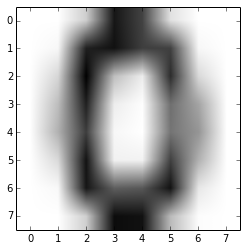

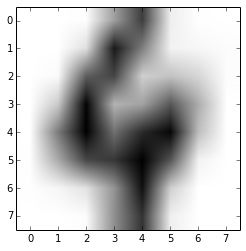

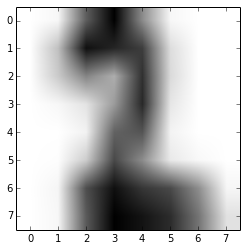

In [7]:
print kmeans.labels_
print digits.target
for image in kmeans.cluster_centers_:
    imshow(np.reshape(image, (8, 8)), cmap='Greys')   
    plt.show()

Predicted: 2, Actual: 1


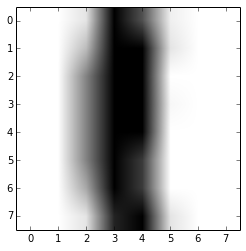

Predicted: 6, Actual: 5


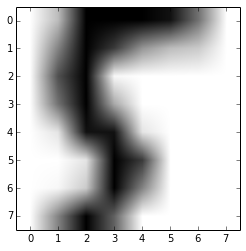

Predicted: 9, Actual: 2


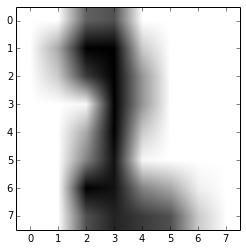

Predicted: 4, Actual: 6


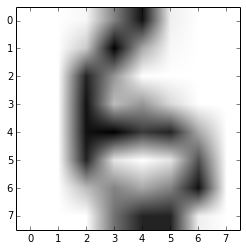

Predicted: 2, Actual: 8


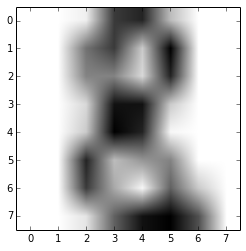

Predicted: 4, Actual: 6


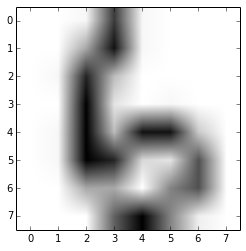

Predicted: 2, Actual: 8


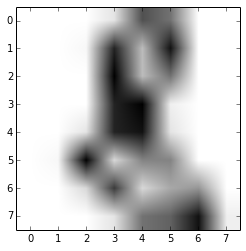

Predicted: 0, Actual: 9


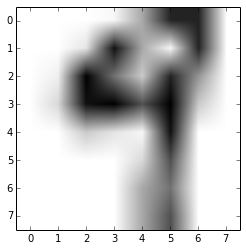

Predicted: 4, Actual: 6


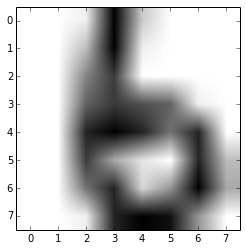

Predicted: 5, Actual: 9


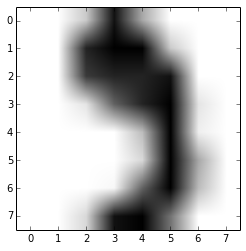

In [13]:
cluster = 0
for i, label in enumerate(kmeans.labels_):
    if cluster == 10:
        break
    if label != digits.target[i]:
        print 'Predicted: ' +  str(label) + ', Actual: ' + str(digits.target[i])
        plt.imshow(digits.images[i].reshape(8,8), cmap='Greys')
        plt.show()
        cluster += 1

The reason why some digits were misclassified is obvious: due to illegability, some digits, which looks similar, were misclassified.

# №2

In [14]:
image = imread('parrots.jpg')
image = np.array(image, dtype=np.float16) / 255  # for rgb being from 0 to 1

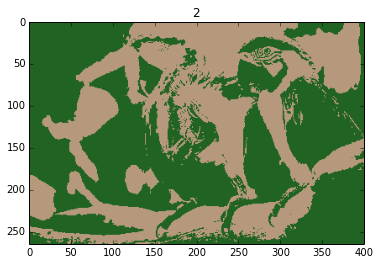

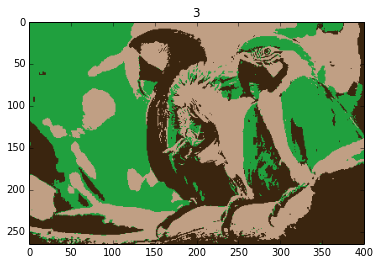

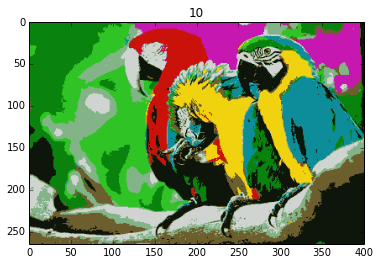

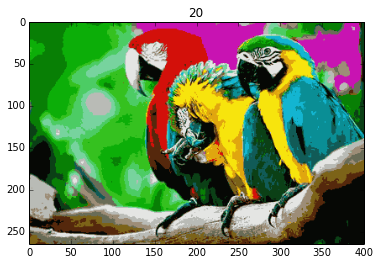

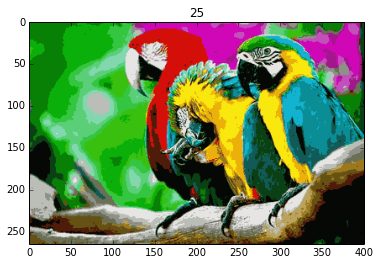

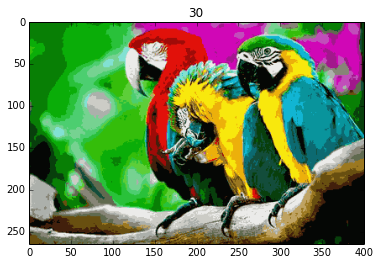

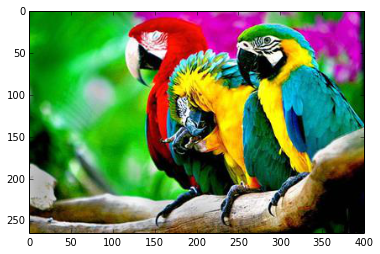

In [17]:
height, width, rgb = image.shape
reshaped_image = np.reshape(image, (height*width, rgb))
clusters = (2, 3, 10, 20, 25, 30)
for n_cluster in clusters:
    clustered_image = list()
    kmeans = KMeans(n_clusters=n_cluster, n_init=10)
    labels = kmeans.fit_predict(reshaped_image)  
    for i in labels:
        clustered_image.append(kmeans.cluster_centers_[i])
    clustered_image = np.array(clustered_image)
    clustered_image = clustered_image.reshape((height, width, rgb))
    plt.imshow(clustered_image)
    plt.title(str(n_cluster))
    plt.show()
plt.imshow(image)

From K equal to 20 picture is alredy acceptable

# №3

In [4]:
image = imread('grass.jpg')
image = np.array(image, dtype=np.float16) / 255  # for rgb being from 0 to 1

(481, 321, 3)


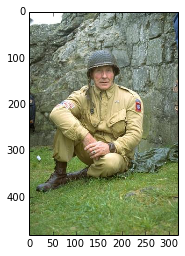

In [5]:
print image.shape
plt.imshow(image)

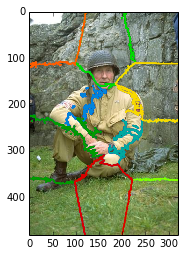

In [7]:
image_dimension = list()
N_REGIONS = 11
lam = 0.009
for x, rgbs in enumerate(image):
    for y, rgb in enumerate(rgbs):
        image_dimension.append(np.hstack((x * lam, y * lam , rgb)))
kmeans = KMeans(n_clusters=N_REGIONS, n_init=10)
labels = kmeans.fit_predict(image_dimension) 
labels = labels.reshape(image.shape[0], image.shape[1])
plt.imshow(image)
for l in range(N_REGIONS):
    plt.contour(labels == l, contours=1,
                colors=[plt.cm.spectral(l / float(N_REGIONS)), ])

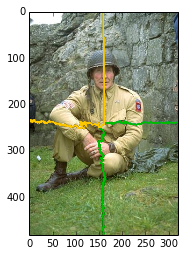

In [8]:
image_dimension = list()
N_REGIONS = 4
lam = 0.009
for x, rgbs in enumerate(image):
    for y, rgb in enumerate(rgbs):
        image_dimension.append(np.hstack((x * lam, y * lam , rgb)))
kmeans = KMeans(n_clusters=N_REGIONS, n_init=10)
labels = kmeans.fit_predict(image_dimension) 
labels = labels.reshape(image.shape[0], image.shape[1])
plt.imshow(image)
for l in range(N_REGIONS):
    plt.contour(labels == l, contours=1,
        colors=[plt.cm.spectral(l / float(N_REGIONS)), ])

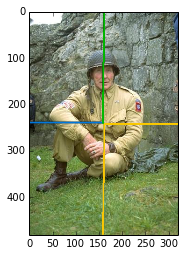

In [9]:
image_dimension = list()
N_REGIONS = 4
lam = 1
for x, rgbs in enumerate(image):
    for y, rgb in enumerate(rgbs):
        image_dimension.append(np.hstack((x * lam, y * lam , rgb)))
kmeans = KMeans(n_clusters=N_REGIONS, n_init=10)
labels = kmeans.fit_predict(image_dimension) 
labels = labels.reshape(image.shape[0], image.shape[1])
plt.imshow(image)
for l in range(N_REGIONS):
    plt.contour(labels == l, contours=1,
        colors=[plt.cm.spectral(l / float(N_REGIONS)), ])

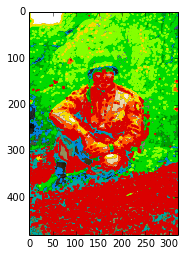

In [10]:
image_dimension = list()
N_REGIONS = 11
lam = 0.0000001
for x, rgbs in enumerate(image):
    for y, rgb in enumerate(rgbs):
        image_dimension.append(np.hstack((x * lam, y * lam , rgb)))
kmeans = KMeans(n_clusters=N_REGIONS, n_init=10)
labels = kmeans.fit_predict(image_dimension) 
labels = labels.reshape(image.shape[0], image.shape[1])
plt.imshow(image)
for l in range(N_REGIONS):
    plt.contour(labels == l, contours=1,
        colors=[plt.cm.spectral(l / float(N_REGIONS)), ])

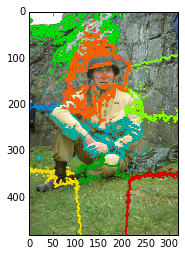

In [11]:
image_dimension = list()
N_REGIONS = 11
lam = 0.005
for x, rgbs in enumerate(image):
    for y, rgb in enumerate(rgbs):
        image_dimension.append(np.hstack((x * lam, y * lam , rgb)))
kmeans = KMeans(n_clusters=N_REGIONS, n_init=10)
labels = kmeans.fit_predict(image_dimension) 
labels = labels.reshape(image.shape[0], image.shape[1])
plt.imshow(image)
for l in range(N_REGIONS):
    plt.contour(labels == l, contours=1,
        colors=[plt.cm.spectral(l / float(N_REGIONS)), ])

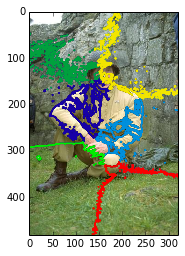

In [12]:
image_dimension = list()
N_REGIONS = 7
lam = 0.005
for x, rgbs in enumerate(image):
    for y, rgb in enumerate(rgbs):
        image_dimension.append(np.hstack((x * lam, y * lam , rgb)))
kmeans = KMeans(n_clusters=N_REGIONS, n_init=10)
labels = kmeans.fit_predict(image_dimension) 
labels = labels.reshape(image.shape[0], image.shape[1])
plt.imshow(image)
for l in range(N_REGIONS):
    plt.contour(labels == l, contours=1,
        colors=[plt.cm.spectral(l / float(N_REGIONS)), ])

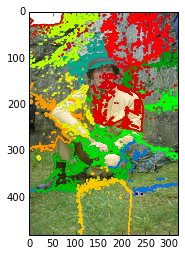

In [13]:
image_dimension = list()
N_REGIONS = 20
lam = 0.005
for x, rgbs in enumerate(image):
    for y, rgb in enumerate(rgbs):
        image_dimension.append(np.hstack((x * lam, y * lam , rgb)))
kmeans = KMeans(n_clusters=N_REGIONS, n_init=10)
labels = kmeans.fit_predict(image_dimension) 
labels = labels.reshape(image.shape[0], image.shape[1])
plt.imshow(image)
for l in range(N_REGIONS):
    plt.contour(labels == l, contours=1,
        colors=[plt.cm.spectral(l / float(N_REGIONS)), ])

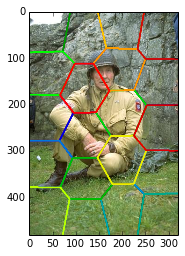

In [14]:
image_dimension = list()
N_REGIONS = 20
lam = 1
for x, rgbs in enumerate(image):
    for y, rgb in enumerate(rgbs):
        image_dimension.append(np.hstack((x * lam, y * lam , rgb)))
kmeans = KMeans(n_clusters=N_REGIONS, n_init=10)
labels = kmeans.fit_predict(image_dimension) 
labels = labels.reshape(image.shape[0], image.shape[1])
plt.imshow(image)
for l in range(N_REGIONS):
    plt.contour(labels == l, contours=1,
        colors=[plt.cm.spectral(l / float(N_REGIONS)), ])

The higher lambda is the more algorithm concerns about the location of certain pixel and less about its color.